In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

Случайно сгенерированные данные

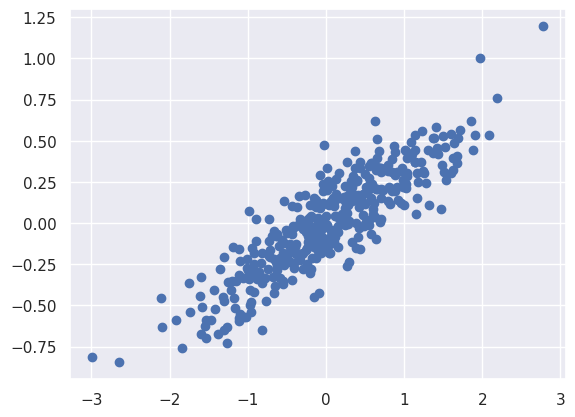

In [11]:
rng=np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.randn(2,400)).T
plt.scatter(X[:,0],X[:,1])

[[-0.95094936 -0.3093466 ]
 [-0.3093466   0.95094936]]
[0.81446524 0.01933404]


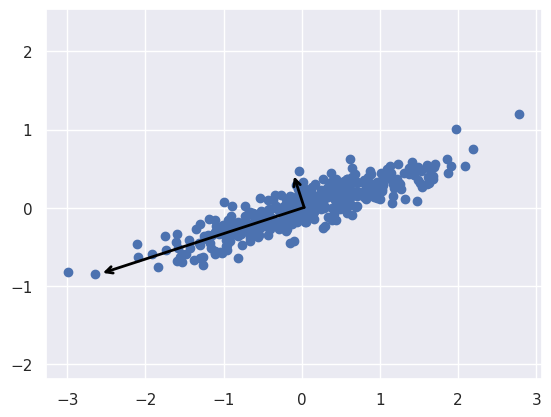

In [12]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

def draw_vector(v0,v1,ax=None):
  ax=ax or plt.gca()
  arrowprops=dict(arrowstyle='->', linewidth=2, color='black', shrinkA=0, shrinkB=0)
  ax.annotate('',v1,v0,arrowprops=arrowprops)

plt.scatter(X[:,0],X[:,1])
for length, vector in zip(pca.explained_variance_, pca.components_):
  v=vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal');


Сокращаем размерность на один

[[-0.95094936 -0.3093466 ]]
[0.81446524]
(400, 2)
(400, 1)


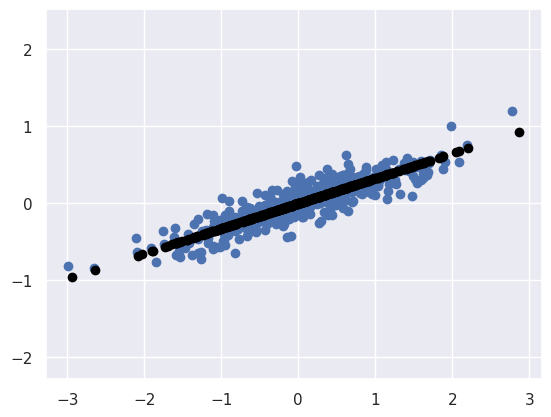

In [13]:
pca=PCA(n_components=1)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)
X_pca=pca.transform(X)
print(X.shape)
print(X_pca.shape)

X_new=pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_new[:,0],X_new[:,1],color='black')
plt.axis('equal');
